In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Netflix\Dataset\netflix.csv')
data = pd.read_csv(r'E:\NextStep\Scaler\Business-Case-Study\Netflix\Dataset\netflix.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
data.info()
# No. of rows: 8807, No. of columns: 12
# All columns except release_year are string


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data.describe()
# Release year: Dataset contains movies from 1925 to 2021
# 50% of Movies/shows present in netflix are released after 2017

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
data.describe(include = 'object')
# Type: There are 2 types of videos: Movies and Shows
# Country: There should be some typo in the country as there are only 190 countries are recognised
# date_added: Movies are added mostly on same days

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# Data Cleaning

In [8]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Only in less number of samples date_added, rating and duration values are missing. Hence such samples can be dropped. whereas director and cast details are missing large number of samples

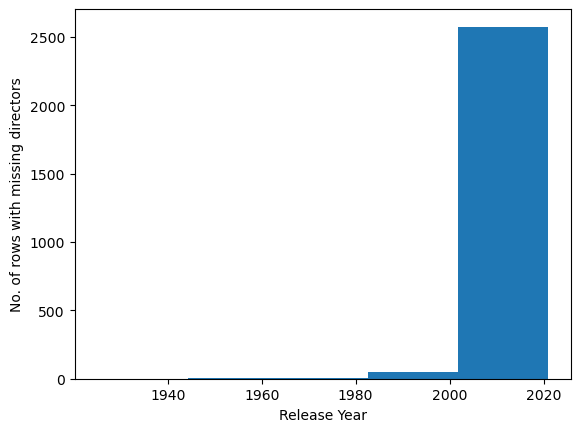

In [31]:
cnt, bins, _ = plt.hist(data[data['director'].isna()]['release_year'], bins = 5)
plt.xlabel('Release Year')
plt.ylabel('No. of rows with missing directors')
plt.show()
# Inference: Samples with movies/shows released after 2000 are having missing director names
# 

In [27]:
plt.bar(np.arange(len(cnt)), cnt*100/cnt.sum())

(array([1.000e+00, 2.000e+00, 8.000e+00, 4.900e+01, 2.574e+03]),
 array([1925. , 1944.2, 1963.4, 1982.6, 2001.8, 2021. ]))

# Data Exploration

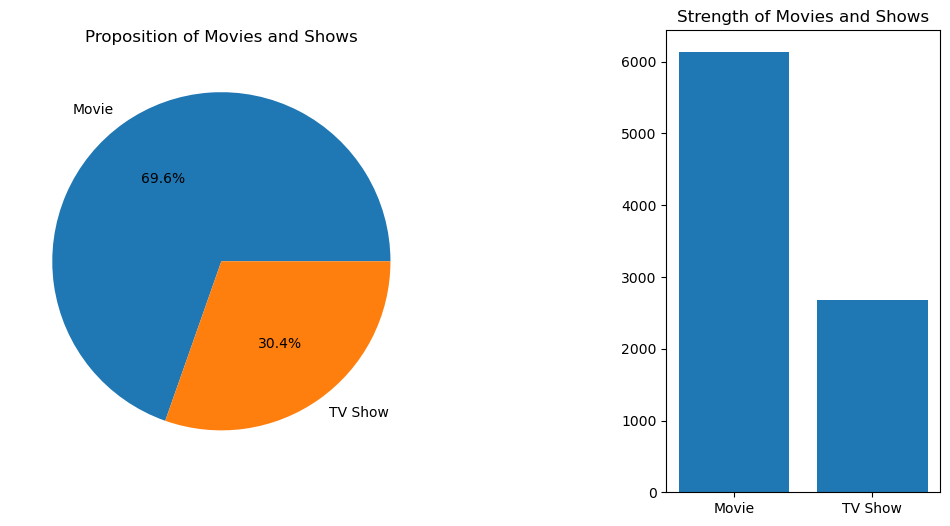

In [97]:
# Type Column
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(data['type'].value_counts().reset_index()['count'], labels = list(data['type'].value_counts().index), autopct = '%0.1f%%')
plt.title('Proposition of Movies and Shows')
plt.subplot(1,3,3)
plt.bar(height = data['type'].value_counts().reset_index()['count'], x = list(data['type'].value_counts().index))
plt.title('Strength of Movies and Shows')

plt.show()

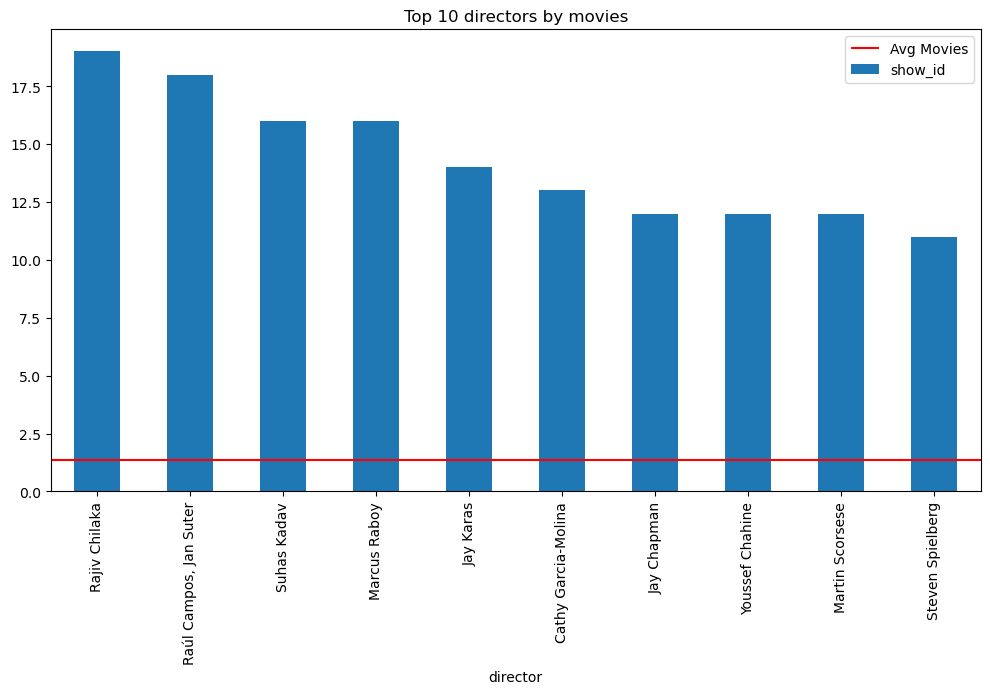

In [111]:
# Director
plt.figure(figsize=(12,6))
data_grp = data.groupby('director')['show_id'].count().sort_values(ascending=False)
data_grp.iloc[:10].plot(kind='bar')
plt.title('Top 10 directors by movies')
plt.hlines(data_grp.mean(), -1, 10, color = 'r', label='Avg Movies by director')
plt.legend()

<Axes: xlabel='release_year', ylabel='show_id'>

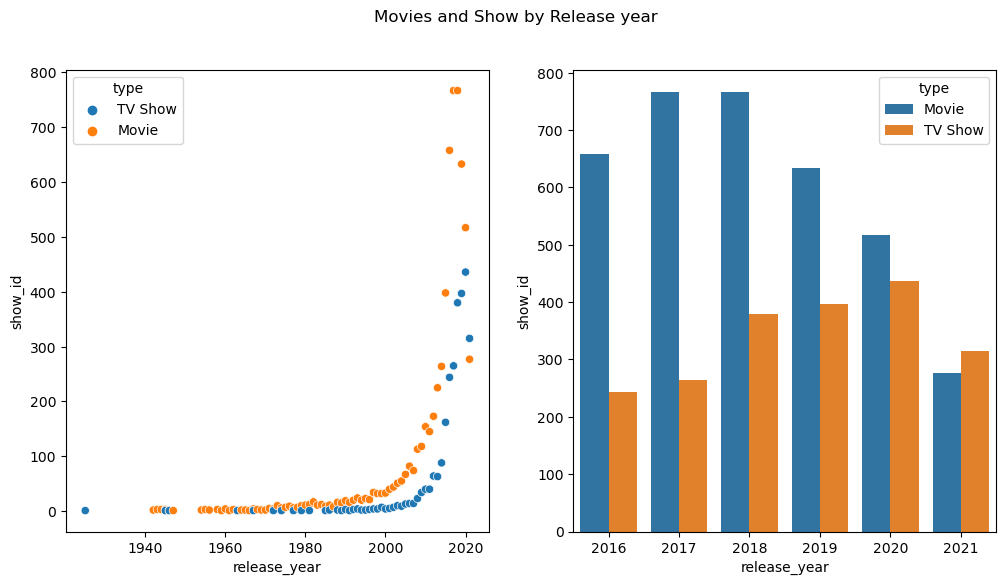

In [85]:
# Movies and Shows by year
plt.figure(figsize=(12,6)).suptitle('Movies and Show by Release year')
data_grp = data.groupby(['release_year', 'type'])['show_id'].count().reset_index()
plt.subplot(1,2,1)
sns.scatterplot(data = data_grp, x = 'release_year', y='show_id', hue = 'type')
plt.subplot(1,2,2)
sns.barplot(data = data_grp[data_grp['release_year'] > 2015], x = 'release_year', y='show_id', hue = 'type')
# Plot1: No of movies/shows presetnt in the netflix are predominantly released after 2010
# Plot2: The strength of TV shows compared to movies are increasing towards the end and in other words movies see a decling trend

In [115]:
#cast
data['cast_list'] = data['cast'].str.split(',')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[Ama Qamata, Khosi Ngema, Gail Mabalane, Th..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Mark Ruffalo, Jake Gyllenhaal, Robert Downe..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Jesse Eisenberg, Woody Harrelson, Emma Ston..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Tim Allen, Courteney Cox, Chevy Chase, Kat..."


In [118]:
data_exp_cast = data[['show_id', 'cast_list']].explode('cast_list')

In [136]:
pd.pivot_table(data_exp_cast, values = 'show_id', columns=['cast_list'], aggfunc='count')

cast_list,Jr.,"""Riley"" Lakdhar Dridi",'Najite Dede,2 Chainz,2Mex,50 Cent,9m88,A Boogie Wit tha Hoodie,A. Murat Özgen,A.C. Peterson,...,Çağatay Ulusoy,Çağlar Çorumlu,Çetin Tekindor,Öykü Karayel,Úrsula Corberó,İbrahim Büyükak,İbrahim Çelikkol,Şahin Irmak,Şükrü Özyıldız,Ṣọpẹ́ Dìrísù
show_id,2,1,1,1,1,4,1,1,1,1,...,2,1,1,1,2,1,1,1,1,1


In [137]:
data_exp_cast['cast_list'].nunique()

39296

## country

In [138]:
data['country'].nunique()

748

<Axes: xlabel='date_added', ylabel='show_id'>

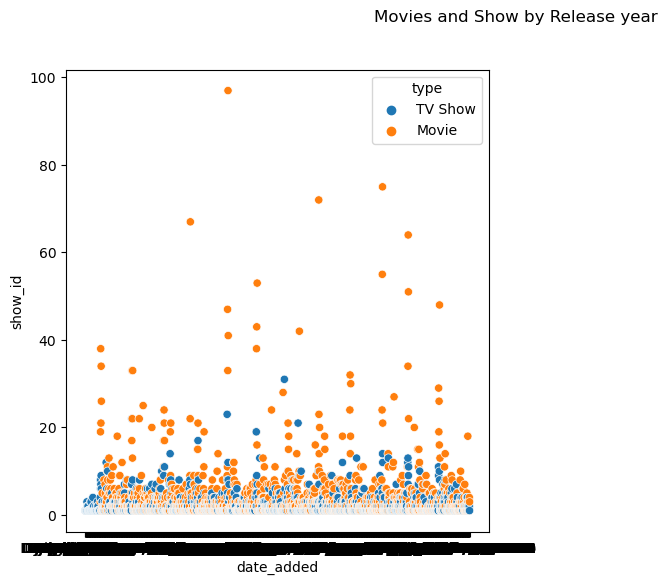

In [6]:
# Movies and Shows by year
plt.figure(figsize=(12,6)).suptitle('Movies and Show by Release year')
data_grp = data.groupby(['date_added', 'type'])['show_id'].count().reset_index()
plt.subplot(1,2,1)
sns.scatterplot(data = data_grp, x = 'date_added', y='show_id', hue = 'type')
#plt.subplot(1,2,2)
#sns.barplot(data = data_grp[data_grp['date_added'] > 2015], x = 'date_added', y='show_id', hue = 'type')
# Plot1: No of movies/shows presetnt in the netflix are predominantly released after 2010
# Plot2: The strength of TV shows compared to movies are increasing towards the end and in other words movies see a decling trend

In [5]:
data['date_added']  = pd.to_datetime(data['date_added'].str.strip())

In [8]:
data['date_added_mon'] = data['date_added'].dt.month_name()
data['date_added_yr'] = data['date_added'].dt.year
data['date_added_day'] = data['date_added'].dt.day

In [101]:
data['date_added_weekday'] = data['date_added'].dt.day_name()

<Axes: xlabel='date_added_mon', ylabel='show_id'>

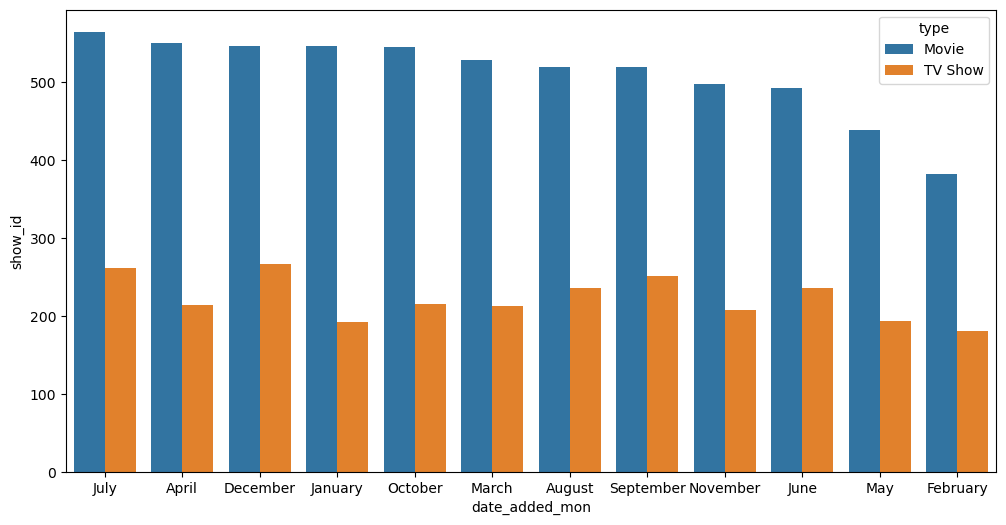

In [15]:
plt.figure(figsize=(12,6))
data_grp = data.groupby(['date_added_mon', 'type'])['show_id'].count().reset_index().sort_values(['type', 'show_id'], ascending = [True, False])
sns.barplot(data = data_grp, x = 'date_added_mon', y='show_id', hue = 'type')
plt.title('Addition of Movies/TV shows by Month')

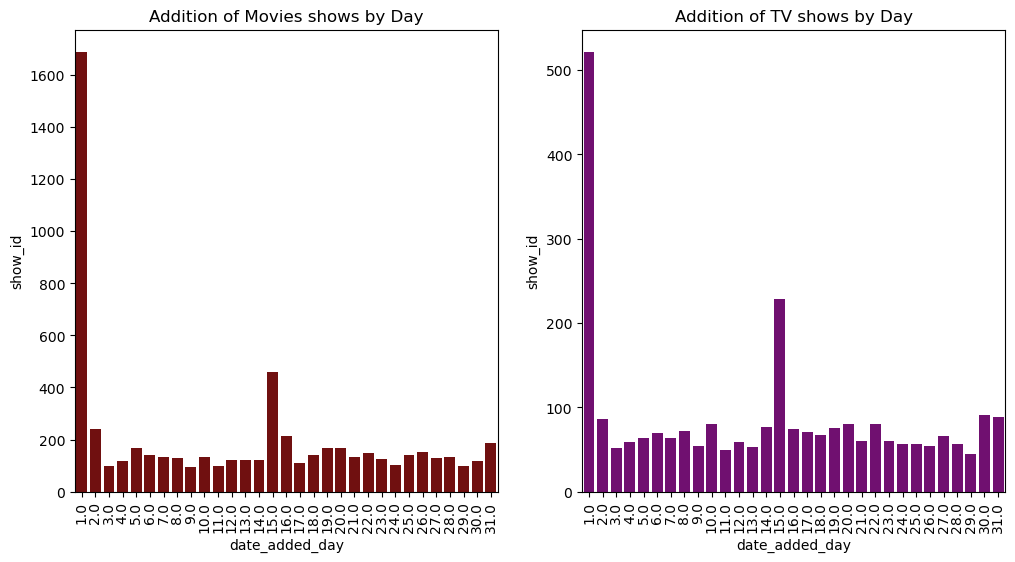

In [29]:
plt.figure(figsize=(12,6))
data_grp = data.groupby(['date_added_day', 'type'])['show_id'].count().reset_index()
plt.subplot(1,2,1)
sns.barplot(data = data_grp[data_grp['type'] == 'Movie'], x = 'date_added_day', y='show_id', color = 'maroon')#, hue = 'type')
plt.title('Addition of Movies shows by Day')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(data = data_grp[data_grp['type'] != 'Movie'], x = 'date_added_day', y='show_id', color = 'purple')#, hue = 'type')
plt.title('Addition of TV shows by Day')
plt.xticks(rotation = 90)
plt.show()
# Both plots clearly depicts that major addition of movies/tv shows on start of the month and mid of the month

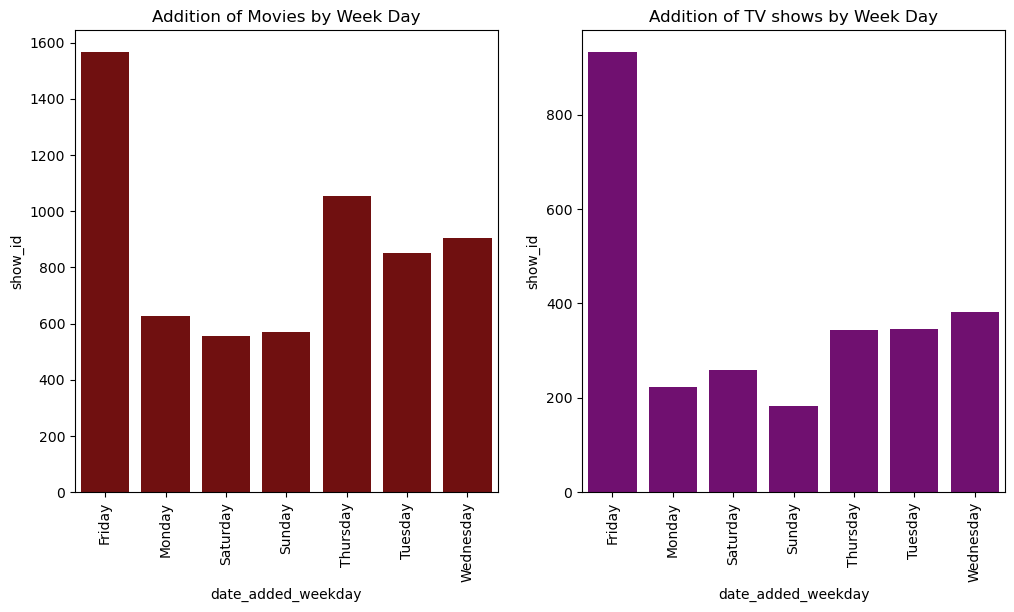

In [102]:
plt.figure(figsize=(12,6))

data_grp = data.groupby(['date_added_weekday', 'type'])['show_id'].count().reset_index()
plt.subplot(1,2,1)
sns.barplot(data = data_grp[data_grp['type'] == 'Movie'], x = 'date_added_weekday', y='show_id', color = 'maroon')#, hue = 'type')
plt.title('Addition of Movies by Week Day')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(data = data_grp[data_grp['type'] != 'Movie'], x = 'date_added_weekday', y='show_id', color = 'purple')#, hue = 'type')
plt.title('Addition of TV shows by Week Day')
plt.xticks(rotation = 90)
plt.show()
# It is clearly evident that majority of movies/tv shows are added on Friday targeting the weekend audience

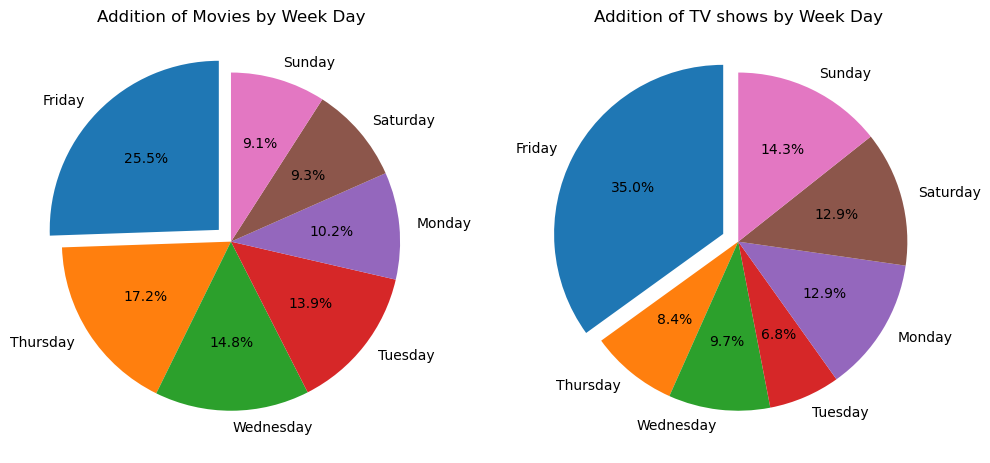

In [110]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(data[data['type'] == 'Movie']['date_added_weekday'].value_counts(),#.sort_values(ascending=False), 
        labels = list(data['date_added_weekday'].value_counts().index), autopct='%0.1f%%', startangle = 90, explode=[0.1,0,0,0,0,0,0])
plt.title('Addition of Movies by Week Day')
plt.subplot(1,2,2)
plt.pie(data[data['type'] != 'Movie']['date_added_weekday'].value_counts(sort=False).sort_index(), #.sort_values(ascending=False), 
        labels = list(data['date_added_weekday'].value_counts().index), 
        autopct='%0.1f%%', startangle = 90, explode=[0.1,0,0,0,0,0,0])
plt.title('Addition of TV shows by Week Day')
plt.show()

## Rating

In [31]:
data['rating'].nunique()

17

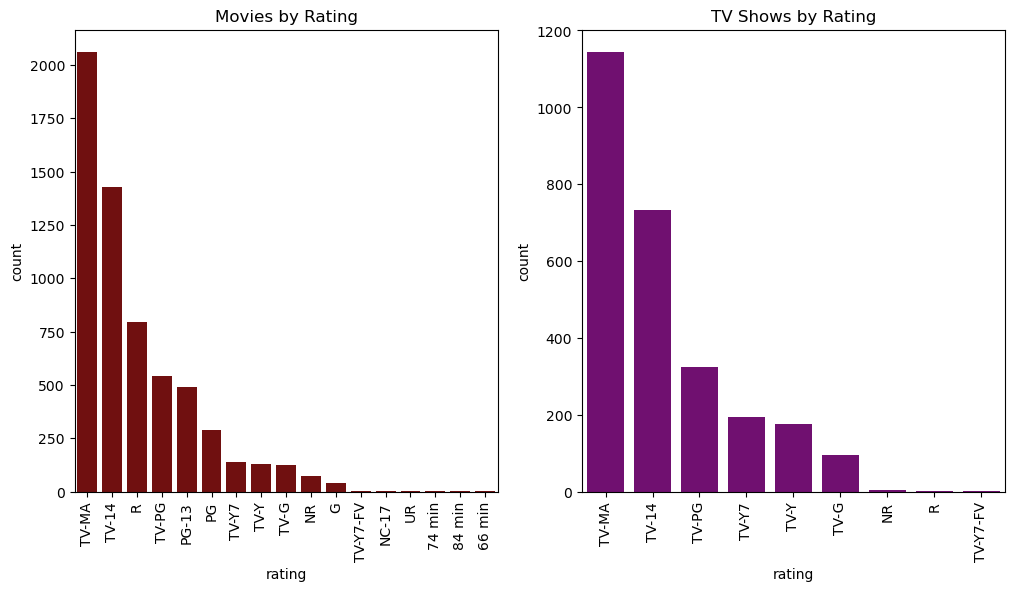

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(data = data[data['type'] == 'Movie'], x = 'rating', color = 'maroon', order = data[data['type'] == 'Movie']['rating'].value_counts().index)
plt.title('Movies by Rating')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(data = data[data['type'] != 'Movie'], x = 'rating', color = 'purple', order = data[data['type'] != 'Movie']['rating'].value_counts().index)
plt.title('TV Shows by Rating')
plt.xticks(rotation = 90)
plt.show()
# TV-MA (Mature Audience), TV-14 (Unsuitable for 14 years) are the majority of the movies present in netflix
# Intrestingly 'R' rated TV shows are very less compared to the 'R' rated movies (Restricted - Adult Content)
# Most of the movies/TV shows listed in netflix are unsuitable for children

# Listed in (Genre)

In [82]:
data['genre'] = data['listed_in'].str.split(',')

In [83]:
data_exp_gen = data[['show_id','type', 'genre']].explode('genre')
data_exp_gen['genre'] = data_exp_gen['genre'].str.strip()

In [84]:
data_exp_gen['genre'].nunique()

42

In [85]:
data_grp = pd.get_dummies(data_exp_gen, columns = ['genre'])


Text(0.5, 1.0, 'TV shows by Genre')

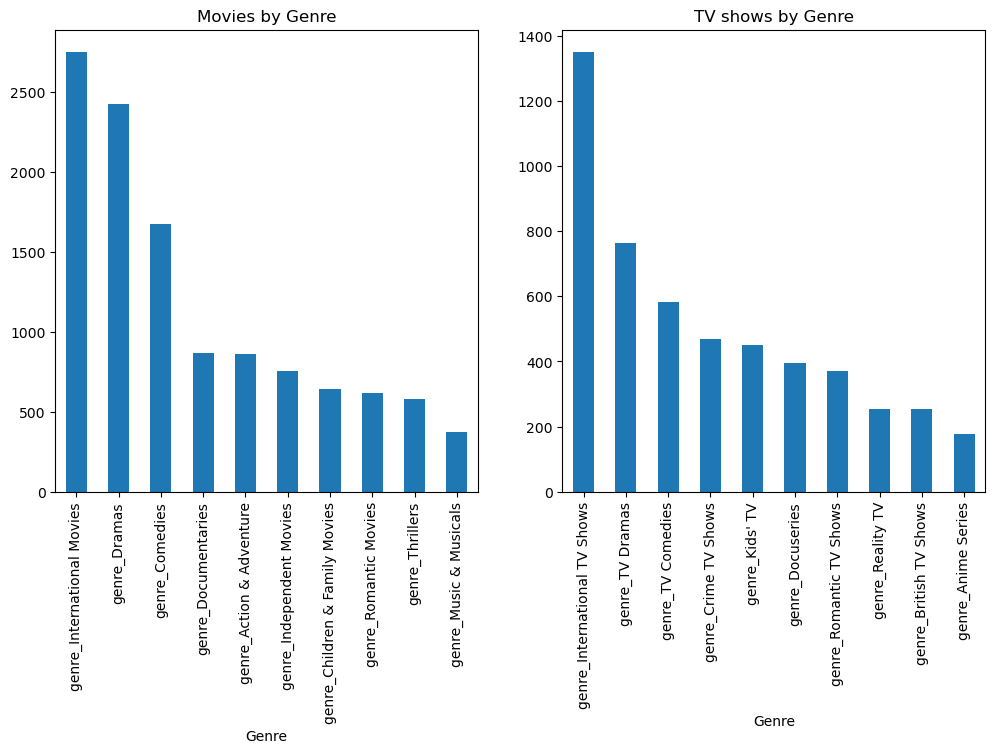

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
test = data_grp[data_grp['type'] == 'Movie'].drop('type', axis=1).groupby(['show_id']).sum()
test.sum(axis = 0).sort_values(ascending = False).iloc[:10].plot(kind='bar')
plt.xlabel('Genre')
plt.title('Top 10 Genre for Movies')
plt.subplot(1,2,2)
test = data_grp[data_grp['type'] != 'Movie'].drop('type', axis=1).groupby(['show_id']).sum()
test.sum(axis = 0).sort_values(ascending = False).iloc[:10].plot(kind='bar')
plt.xlabel('Genre')
plt.title('Top 10 Genre for TV shows')
# Most of the shows are International Movies/TV shows
# Most of the movies belong to Dramas and comedies genre

In [169]:
data_exp_gen['genre'] = data_exp_gen['genre'].str.lower()

In [176]:
data_exp_gen['genre'] = data_exp_gen['genre'].str.replace('tv', '').str.replace('shows', '').str.replace('movies', '').str.strip()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'documentaries'),
  Text(1, 0, 'international'),
  Text(2, 0, 'dramas'),
  Text(3, 0, 'mysteries'),
  Text(4, 0, 'crime'),
  Text(5, 0, 'action & adventure'),
  Text(6, 0, 'docuseries'),
  Text(7, 0, 'reality'),
  Text(8, 0, 'romantic'),
  Text(9, 0, 'comedies'),
  Text(10, 0, 'horror'),
  Text(11, 0, 'children & family'),
  Text(12, 0, 'independent'),
  Text(13, 0, 'british'),
  Text(14, 0, 'spanish-language'),
  Text(15, 0, 'thrillers'),
  Text(16, 0, 'music & musicals'),
  Text(17, 0, 'sci-fi & fantasy'),
  Text(18, 0, "kids'"),
  Text(19, 0, 'classic'),
  Text(20, 0, 'anime features'),
  Text(21, 0, 'sports'),
  Text(22, 0, 'anime series'),
  Text(23, 0, 'korean'),
  Text(24, 0, 'science & nature'),
  Text(25, 0, 'teen'),
  Text(26, 0, 'cult'),
  Text(27, 0, ''),
  Text(28, 0, 'faith & spirituality'),
  Text(29, 0, 'lgbtq

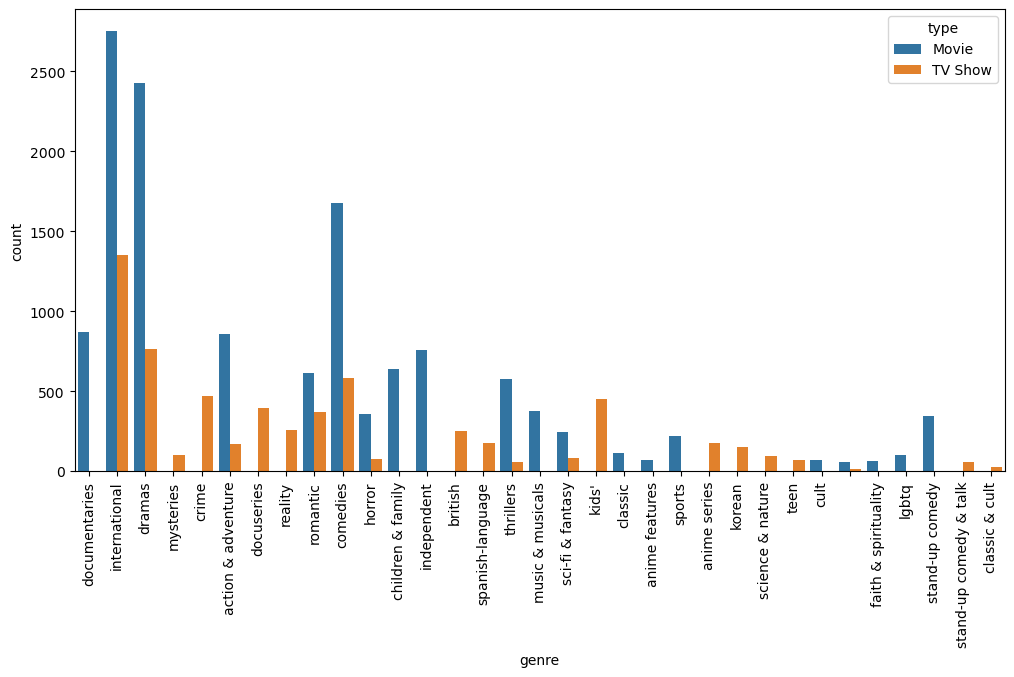

In [178]:
plt.figure(figsize=(12, 6))
sns.countplot(data = data_exp_gen, x = 'genre', hue = 'type')
plt.xticks(rotation = 90);

In [180]:
# Merge Documentaries and Docuseries, Classic/Cult to Classic & Cult, remove series, features, & talk
data_exp_gen['genre'] = data_exp_gen['genre'].str.replace('docuseries', 'documentaries').str.replace('series', '').str.replace('features', '').str.replace('& talk', '').str.strip()

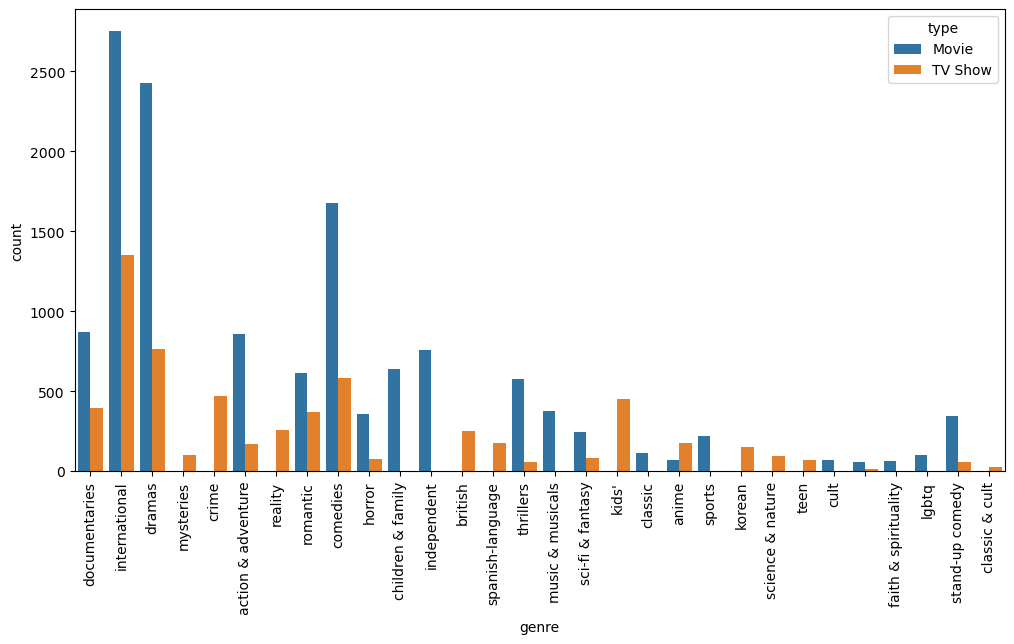

In [181]:
plt.figure(figsize=(12, 6))
sns.countplot(data = data_exp_gen, x = 'genre', hue = 'type')
plt.xticks(rotation = 90);

## Duration

In [114]:
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [151]:
dur_movie = data[data['type'] == 'Movie']['duration'].str.split()
dur_movie.str[1].unique()
# All movies are represented in minutes

array(['min', nan], dtype=object)

<Axes: >

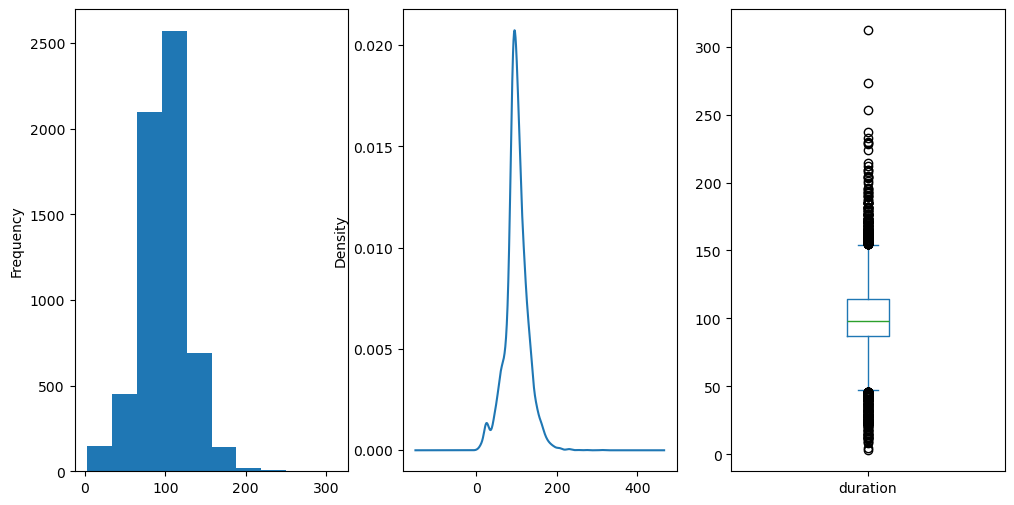

In [164]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
dur_movie.str[0].astype('float64').plot(kind='hist')
plt.subplot(1,3,2)
dur_movie.str[0].astype('float64').plot(kind='kde')
plt.subplot(1,3,3)
dur_movie.str[0].astype('float64').plot(kind='box')

In [160]:
dur_show = data[data['type'] != 'Movie']['duration'].str.split()
dur_show.str[1].unique()
# All shows are represented as seasons

array(['Seasons', 'Season'], dtype=object)

<Axes: >

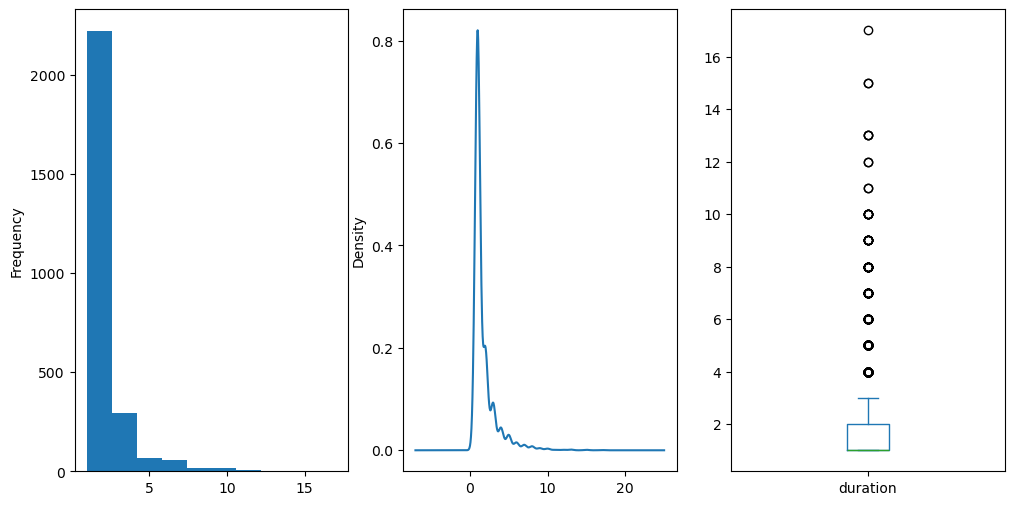

In [166]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
dur_show.str[0].astype('float64').plot(kind='hist')
plt.subplot(1,3,2)
dur_show.str[0].astype('float64').plot(kind='kde')
plt.subplot(1,3,3)
dur_show.str[0].astype('float64').plot(kind='box')